Сформулируем задачу. 
С использованием метода скорейшего спуска найти минимум следующей функции:



$f(x_1,x_2)=2x_1^2+2x_1x_2+x_2^2 +x_1 - x_2$ \\

\\

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pylab
import math

# Abstract

Имеем функционал - $f(x_1,x_2)=x_1^2+x_2^2-2x_1-4x_2+5$ 


In [2]:
x1 = np.outer(np.linspace(-10, 10, 30), np.ones(30)) 
x2 = x1.copy().T  
z = 2*(x1**2) + 2*x1*x2 + x2**2 + x1 - x2

fig = go.Figure(data=[go.Surface(x=x1, y=x2, z=z)]) 

fig.update_layout(autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

# Описание процесса оптимизации

Будем находить такие $x_1, x_2$, что $f(x_1,x_2) \to \min \limits_{x_1,x_2}$ \\

Для этого будем обновлять аргументы по следующему правилу: \\
$x_i^{k+1} = x_i^{k} - α_k \cdot ∇f(x_i^{k})$ \\
Это общий вид градиентного спуска. В этой ноутбуке рассмотрим 2 подхода к выбору гиперпараметра-темпа обучения
1. $λ = const$
2. $λ = argminf(x^{k} - λ \cdot ∇f(x^{k}))$ \\

Для удобства сразу найдем вектора градиента \\
$\frac{∂f}{∂x_1} = 2x_1 - 2$ \\
$\frac{∂f}{∂x_2} = 2x_2 - 4$ \\
$∇f(x) = (2x_1 - 2; 2x_2 - 4)^T$ \\


---



# Простой способ
Сначала попробуем градиентный спуск с константным выбором темпа обучения. $λ=const$ \\
За критерий останова возьмем: $|f(x^{k+1}) - f(x^{k})| < ϵ$ (1)

In [3]:
#исходный функционал
def func(x):
  return 2*x[0]**2 + 2*x[0]*x[1] + x[0]**2 + x[0] - x[1]

In [4]:
def gradient_descent_with_boring_step():
  step_size = 0.01
  x_old = [10.0, 10.0]    #можно задать
  x = [10.0, 10.0]
  epsilon = 5**(-8)
  difference = 5**(-8) + 1   #начальная инициализация разницы (1)
  

  while difference > epsilon:
    x_old[0] = x[0]   #запоминаем прошлые x
    x_old[1] = x[1]

    x[0] -= step_size*(4*x[0] + 2*x[1] + 1)   #обновляем текущие веса по правилу выше
    x[1] -= step_size*(2*x[0] + 2*x[1] - 1)

    difference = abs(func(x) - func(x_old))

  return x

Посмотрим что нашел наш градиентный спуск с постоянным шагом обучения

In [5]:
gradient_descent_with_boring_step()

[-1.000115611958513, 1.5001866649142093]

Минимум функции в точке (-1;1.5), оно и верно

Посмотрим на красивые картинки, а именно, траекторию движения спуска. Добавим в функцию пару изменений, чисто для того, чтобы запомнить значения вектора **x**

In [6]:
def func(x):
  return 2*x[0]**2 + 2*x[0]*x[1] + x[0]**2 + x[0] - x[1]

In [7]:
#здесь тот же самый градиентный спуск, но запоминаем некоторые значения с предыдущих шагов для графиков, а еще хотим узнать о сходимости
differences_list = list()
step_size = 0.01
x = [-10.0, -10.0]   #можно и рандомно
x_true = [-1.0, 1.5]

x0list = list()   
x1list = list()

difference = 10**(-2) + 1
epsilon = 10**(-2)
iteration_count = 0   #посчитаем за сколько шагов алгоритм достигнет точности выше

while difference > epsilon:
  x[0] -= step_size*(4*x[0] + 2*x[1] + 1)   #обновляем текущие веса по правилу выше
  x[1] -= step_size*(2*x[0] + 2*x[1] - 1)

  difference = abs(func(x) - func(x_true))   #запомним разность функции в текущей точке и точке минимума
  differences_list.append(difference)

  iteration_count += 1

  x0list.append(x[0])
  x1list.append(x[1])

In [8]:
iteration_count

863

Градиентный спуск с $λ = 0.01$ достиг точности $10^{-2}$ за 863 итерации

# Визуализация

In [9]:
x0, x1 = x0list, x1list    #выгрузим списки x в локальные переменные

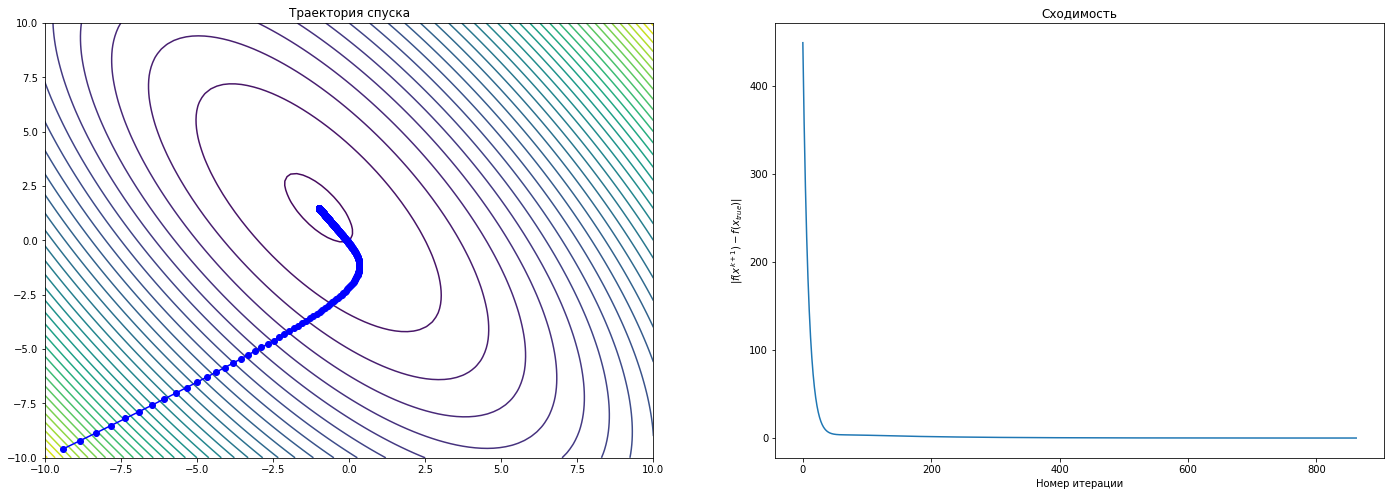

In [10]:
xlist = np.linspace(-10.0, 10.0, 100)
ylist = np.linspace(-10.0, 10.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = 2*(X**2) + 2*X*Y + Y**2 + X - Y

fig = plt.figure(figsize=(24, 8))

ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#путь спуска

ax.contour(X, Y, Z, levels = 40)
#истинный минимум
ax.scatter(-1,1.5, color='red')
#путь при константе
ax.plot(x0, x1, marker='o', color='blue')
ax.set_title('Траектория спуска')

#зависимость изменения значения функции от эпохи
x = np.arange(iteration_count)
ax2.plot(x, differences_list)
ax2.set_title('Сходимость')
ax2.set_xlabel('Номер итерации')
ax2.set_ylabel('$|f(x^{k+1}) - f(x_{true})|$')

plt.show()

# Сложный способ

Теперь вспомним, что мы студенты ПМИ и подойдем к выбору темпа обучения разумно, а именно
$λ = argminf(x^{k} - λ \cdot ∇f(x^{k}))$ \\
Критерий останова оставим все тот же $|f(x^{k+1}) - f(x^{k})| < ϵ$, а сходимость проверим позже

In [11]:
#оптимизатор, чтобы не задумываться о минимизации f(x{k+1})
from scipy.optimize import golden
import math

In [12]:
def super_gradient_descent():
  x = [-10.0, -10.0]
  x_old = [-10.0, -10.0]  #чтобы следить за критерием останова 

  a_optimal = 0
  epsilon = 5**(-8)   #хотим минимиировать, пока значения функций в двух соседних точках не станет меньше этого
  difference = 5**(-8) + 1

  #для удобства выделил компоненты вектора в отдельные функции
  def grad1(x):
    return 4*x[0] + 2*x[1] + 1
  def grad2(x):
    return 2*x[0] + 2*x[1] - 1
  
  #это то самое выражение, которое надо минимизировать по альфа - f(x{k+1})
  def f(a):
    return 2*((x[0] - a*grad1(x))**2) + 2*(x[0] - a*grad1(x))*(x[1] - a*grad2(x)) + (x[1] - a*grad2(x))**2 + x[0] - a*grad1(x) -(x[1] - a*grad2(x))

  while difference > epsilon: 
    x_old[0] = x[0]
    x_old[1] = x[1]

    a_optimal = golden(f, brack=(-10, 10))  #высчитываем оптимальный шаг, для простоты взял оптимизационный метод из scipy, но можно воспользовать и методом золотого сечения 

    x[0] -= a_optimal*(4*x[0] + 2*x[1] + 1)
    x[1] -= a_optimal*(2*x[0] + 2*x[1] - 1)

    difference = abs(func(x) - func(x_old))

  return x

Посмотрим, не отличаются ли результаты с предыдущим градиентным спуском

In [13]:
super_gradient_descent()

[-1.0000044595938666, 1.5000068757895495]

Ответ все тот же, теперь интересно за сколько итераций этот алгоритм достигнет точности $10^{-2}$

# Визуализация

In [14]:
#здесь все тот же спуск с оптимальным выбором шага, только мы хотим помнить некоторые значения, для визуализации
differences_list1 = list()

X0 =list()
X1 =list()

x = [-10.0, -10.0] 
x_true = [-1.0, 1.5]

a_optimal = 0
difference1 = 10**(-2) + 1
epsilon = 10**(-2)
iteration_count = 0   #посчитаем за сколько шагов алгоритм достигнет точности выше

#Компоненты градиента
def grad1(x):
  return 4*x[0] + 2*x[1] + 1
def grad2(x):
  return 2*x[0] + 2*x[1] - 1
  
#это то самое выражение, которое надо минимизировать по альфа - f(x{k+1})
def f(a):
    return 2*((x[0] - a*grad1(x))**2) + 2*(x[0] - a*grad1(x))*(x[1] - a*grad2(x)) + (x[1] - a*grad2(x))**2 + x[0] - a*grad1(x) -(x[1] - a*grad2(x))

while difference1 > epsilon: 
  a_optimal = golden(f, brack=(-10, 10))

  x[0] -= a_optimal*(4*x[0] + 2*x[1] + 1)
  x[1] -= a_optimal*(2*x[0] + 2*x[1] - 1)

  iteration_count += 1

  X0.append(x[0])
  X1.append(x[1])

  difference1 = abs(func(x) - func(x_true))
  differences_list1.append(difference1)

In [15]:
iteration_count

20

Градиентный спуск с оптимальным $λ$ достиг точности $10^{-2}$ за 20 итераций!!!WOW

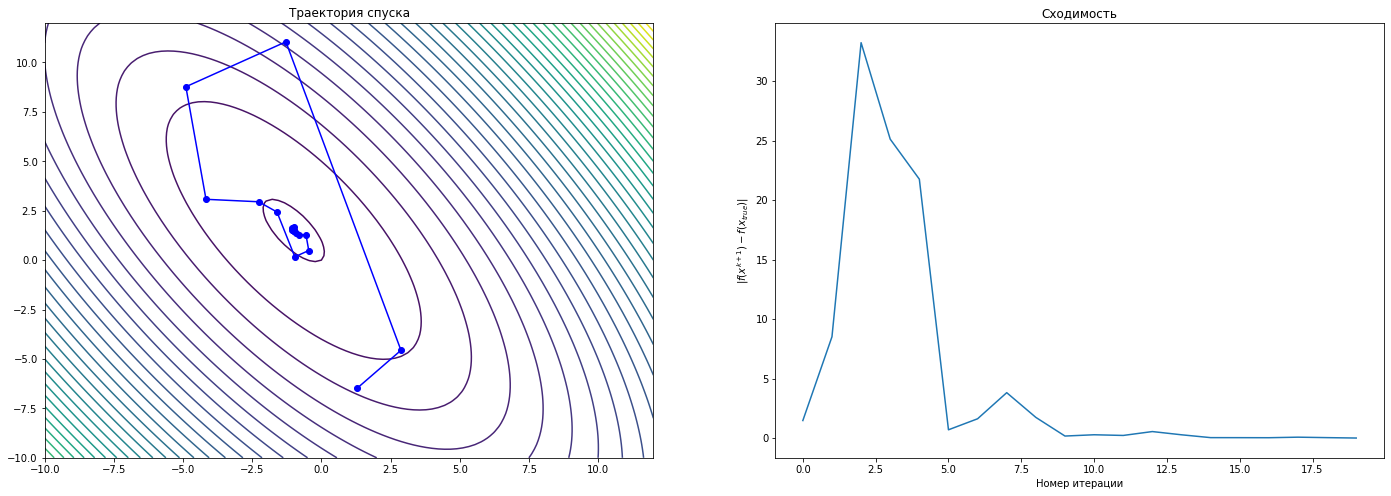

In [16]:
xlist = np.linspace(-10.0, 12.0, 100)
ylist = np.linspace(-10.0, 12.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = 2*(X**2) + 2*X*Y + Y**2 + X - Y

fig = plt.figure(figsize=(24, 8))

ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#путь спуска

ax.contour(X, Y, Z, levels = 40)
#истинный минимум
ax.scatter(-1,1.5, color='red')
#путь при оптимальном шаге
ax.plot(X0, X1, marker='o', color='blue')
ax.set_title('Траектория спуска')

#зависимость изменения значения функции от эпохи
x = np.arange(iteration_count)
ax2.plot(x, differences_list1)
ax2.set_title('Сходимость')
ax2.set_xlabel('Номер итерации')
ax2.set_ylabel('$|f(x^{k+1}) - f(x_{true})|$')

plt.show()

# Итоги

Я вдоволь поигрался с гиперпараметром градиентного спуска - темпом обучения.
Оба спуска были в одинаковых начальных точках (-10, 10).
Градиентный спуск с параметром обучения $λ = 0.01$ достиг точности $10^{-2}$ с истинным значением минимиума за 863 итерации, а метод наискорешего спуска с $λ = argminf(x^{k} - λ \cdot ∇f(x^{k}))$ достиг той же точности всего за 20 операций!!!

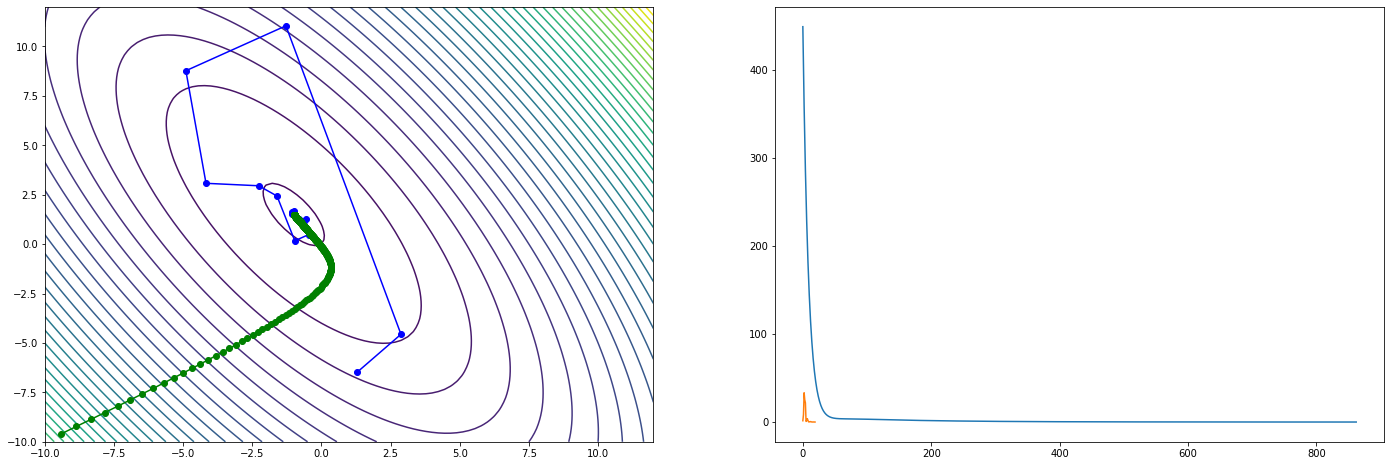

In [17]:
xlist = np.linspace(-10.0, 12.0, 100)
ylist = np.linspace(-10.0, 12.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = 2*(X**2) + 2*X*Y + Y**2 + X - Y

fig = plt.figure(figsize=(24, 8))

ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#путь спуска

ax.contour(X, Y, Z, levels = 40)
#истинный минимум
ax.scatter(-1,1.5, color='red')
#путь при оптимальном шаге
ax.plot(X0, X1, marker='o', color='blue')
ax.plot(x0, x1, marker='o', color='green')

#зависимость изменения значения функции от эпохи
x1 =np.arange(863)
x2 =np.arange(20)
ax2.plot(x1, differences_list)
ax2.plot(x2, differences_list1)

plt.show()